In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.22.0
Numpy version: 1.14.1


In [3]:
#read NYC turntable for the week of march 10th
df = pd.read_csv("NYCT180310.csv")

In [4]:
df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [5]:
df.describe()

,ENTRIES,EXITS
count,1.991160e+05,1.991160e+05
mean,3.972039e+07,3.243020e+07
std,2.073240e+08,1.905868e+08
min,0.000000e+00,0.000000e+00
25%,5.048800e+05,2.491722e+05
50%,2.599027e+06,1.462528e+06
75%,6.920500e+06,4.824967e+06
max,2.130056e+09,2.145850e+09


In [6]:
#remove extra spaces in strings of columns
df.columns = df.columns.str.strip()
df.head(20)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,03:00:00,REGULAR,6535802,2213345
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,07:00:00,REGULAR,6535813,2213356
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,11:00:00,REGULAR,6535865,2213436
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,15:00:00,REGULAR,6536048,2213481
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,19:00:00,REGULAR,6536326,2213531
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/03/2018,23:00:00,REGULAR,6536487,2213562
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,03:00:00,REGULAR,6536518,2213570
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,07:00:00,REGULAR,6536526,2213579
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,11:00:00,REGULAR,6536576,2213626
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/04/2018,15:00:00,REGULAR,6536723,2213669


In [7]:
# convert to datetime if necessary
# pd.to_datetime(df.DATE + " " + df.TIME)

#
num_resets = df[df["ENTRIES"] == 0]
print(len(num_resets))
print("There are 3239 resets")
len(df)

3239
There are 3239 resets


199116

In [8]:
#remove reset entries and designate this new dataframe as df_r
df_r = df[df.ENTRIES != 0]
len(df_r[df_r["ENTRIES"] == 0])
print("removed", len(df_r) - len(df_r), "entries")

removed 0 entries


In [9]:
#create a unique string for each turnstile and add it as the 4th index
ts = df_r['C/A']+df_r.UNIT+df_r.SCP+df_r.STATION
df_r.insert(loc=4, column='TS', value=ts)

# ts = df['C/A']+df.UNIT+df.SCP+df.STATION
# df.insert(loc=4, column='TS', value=ts)
# df

In [12]:
# groupby TS and DATE, then create a new column "dif" for max - min
gb = df_r.groupby(["TS","DATE"]).ENTRIES.agg(["min", "max"])
gb["dif"] = gb["max"] - gb["min"]

In [13]:
#plt.barh(gb.index.levels[1],gb.dif)
gb.dif.describe()
#sns.boxplot(gb.dif)
#odd = len(gb[gb.dif > 10000])
#print("there are", odd, "days that had more than 10,000 entries (what I may consider odd/outliers)")


count    3.241900e+04
mean     1.425278e+03
std      3.390631e+04
min      0.000000e+00
25%      2.630000e+02
50%      7.640000e+02
75%      1.471000e+03
max      3.917644e+06
Name: dif, dtype: float64

In [15]:
gb[(gb["min"] == 0) | (gb["max"] == 0)]

,,min,max,dif
TS,DATE,,,


In [17]:
# Take a look at the outliers >10000
print(len(gb[gb["dif"] > 10000]))
gb[gb["dif"] > 10000]

14


min       max      dif
TS                               DATE                                   
G009R15102-00-03CONEY IS-STILLW  03/07/2018        92   3793593  3793501
H038R35000-06-00LIVONIA AV       03/03/2018    458766    475010    16244
N327R25400-00-00GRAND-NEWTOWN    03/04/2018         7   1225194  1225187
N327R25400-05-04GRAND-NEWTOWN    03/08/2018       382   2029602  2029220
N343R01900-00-04JAMAICA 179 ST   03/06/2018        26   3917670  3917644
PTH01R54900-00-06NEWARK HW BMEBE 03/09/2018        96     87949    87853
PTH03R55200-00-09JOURNAL SQUARE  03/06/2018        58    680608   680550
                                 03/07/2018       431    682273   681842
                                 03/08/2018      1130    685178   684048
                                 03/09/2018      1975    687455   685480
PTH03R55200-02-01JOURNAL SQUARE  03/06/2018        64    151997   151933
PTH18R54901-02-00NEWARK BM BW    03/05/2018        25     94665    94640
PTH22R54000-01-00PATH NEW WTC    03/09/2018      1188    107295   106107
R238R04600-03-04GRD CNTRL-42 ST  03/09/2018  34496754  34506882    10128

### Looking at the data, it seems obvious that some of these entries have been reset (The ones where min are VERY low compared to the max. We can now get a better sense of the correct cutoff to not remove the entries that did not seem to reset, i.e. 20,000.

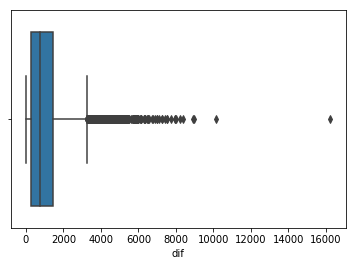

In [18]:
# gb_r is gb with the obviousresets removed
gb_r = gb[gb.dif < 20000]
# Show boxplot 
sns.boxplot(gb_r.dif);

<Container object of 7 artists>

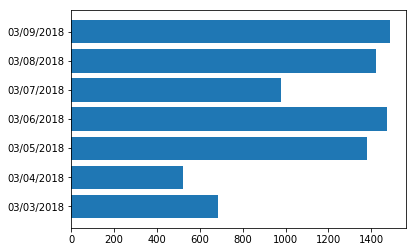

In [19]:
plt.barh(gb_r[:7].index.levels[1], gb_r[:7]["dif"])
#gb_r.index.levels[1]

In [25]:
gb_r.reset_index()

,TS,DATE,min,max,dif
0,A002R05102-00-0059 ST,03/03/2018,6535802,6536487,685
1,A002R05102-00-0059 ST,03/04/2018,6536518,6537037,519
2,A002R05102-00-0059 ST,03/05/2018,6537057,6538436,1379
3,A002R05102-00-0059 ST,03/06/2018,6538452,6539924,1472
4,A002R05102-00-0059 ST,03/07/2018,6539944,6540923,979
5,A002R05102-00-0059 ST,03/08/2018,6540936,6542356,1420
6,A002R05102-00-0059 ST,03/09/2018,6542379,6543867,1488
7,A002R05102-00-0159 ST,03/03/2018,5865197,5865776,579
8,A002R05102-00-0159 ST,03/04/2018,5865810,5866249,439
9,A002R05102-00-0159 ST,03/05/2018,5866268,5867410,1142


In [ ]:
len(gb[(gb["min"] == 0) & (gb["max"] != 0)])

In [26]:
df_r.groupby(["STATION"]).ENTRIES.describe()

,count,mean,std,min,25%,50%,75%,max
STATION,,,,,,,,
1 AV,420.0,3.035571e+08,5.280718e+08,4529.0,2141514.50,9588561.5,3.702676e+08,1.628446e+09
103 ST,630.0,9.960611e+06,8.434279e+06,166753.0,3328577.75,10104431.5,1.318925e+07,3.574006e+07
103 ST-CORONA,387.0,7.077806e+06,5.143360e+06,342321.0,3479605.00,4207166.0,1.128118e+07,1.487817e+07
104 ST,374.0,5.356742e+08,7.873543e+08,8554.0,2913776.75,4341448.5,1.121176e+09,2.025995e+09
110 ST,252.0,5.625495e+06,3.449409e+06,2508236.0,3902684.00,4593553.5,5.057719e+06,1.309813e+07
111 ST,629.0,8.050120e+06,1.231828e+07,94568.0,2040325.00,3393976.0,1.122982e+07,5.033178e+07
116 ST,943.0,7.644091e+07,2.637597e+08,97414.0,1861461.50,5404921.0,7.880002e+06,1.276073e+09
116 ST-COLUMBIA,258.0,2.032448e+08,4.283643e+08,4337088.0,8090918.75,12220256.0,2.344463e+07,1.159154e+09
121 ST,242.0,1.536710e+07,4.301643e+07,766829.0,1145298.50,1827820.5,3.176612e+06,1.510925e+08
